In [1]:
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import pycdfpp
import requests
import xarray

# Loading a CDF file

You can either load a local file from its path or a Python byte array, so you can load a remote file without having to write on disk:

In [2]:
wi_k0_mfi = pycdfpp.load(requests.get("https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/mfi_k0/2022/wi_k0_mfi_20220101_v01.cdf").content)
wi_k0_mfi

CDF:
majority: row

Attributes:
	TEXT_supplement_1: " "
	Mission_group: "Wind"
	Logical_source_description: "Wind Magnetic Fields Investigation, Key Parameters"
	TITLE: "WIND MFI Key Parameters"
	Project: "ISTP>International Solar-Terrestrial Physics"
	Processing_Date: " 2-JAN-2022 13:19:38.99"
	Discipline: "Space Physics>Magnetospheric Science"
	Instrument_type: "Magnetic Fields (space)"
	MODS: [ "Initial Release 7/12/93 ", "Zvar Release 10/24/96 ", "Zvar Update  11/12/96 " ]
	PI_name: "R. Lepping"
	Logical_source: "WI_K0_MFI"
	Source_name: "WIND>Wind Interplanetary Plasma Laboratory"
	Data_type: "K0>Key Parameter"
	Descriptor: "MFI>Magnetic Fields Investigation"
	Data_version: "1"
	Logical_file_id: "WI_K0_MFI_20220101_V01"
	Generation_Program: "WIND_MFI_KP"
	KPGS_Version: "V3.2"
	TEXT: [ "References:                                                                     ", "1. Panetta P. (GSFC), GGS WIND MFI Operator's Manual, September 15, 1992.   ", "2. Computer Sciences Corporation, 

# Accessing a variable is as simple as

In [3]:
BGSEc = wi_k0_mfi["BGSEc"]
BGSEc

BGSEc: (939, 3) [CDF_REAL4]

## A CDF variable has several properties

1. its shape:

In [4]:
BGSEc.shape

[939, 3]

2. its type:

In [5]:
BGSEc.type

<CDF_Types.CDF_REAL4: 21>

3. its name:

In [6]:
BGSEc.name

'BGSEc'

4. its attributes:

In [7]:
BGSEc.attributes

{'DISPLAY_TYPE': DISPLAY_TYPE: " ",
 'FIELDNAM': FIELDNAM: "Magnetic Field - Cartesian GSE",
 'AVG_TYPE': AVG_TYPE: " ",
 'DEPEND_1': DEPEND_1: "cartesian",
 'VALIDMIN': VALIDMIN: [ [ -1000, -1000, -1000 ] ],
 'VAR_NOTES': VAR_NOTES: " ",
 'SCALEMAX': SCALEMAX: [ [ 25, 25, 25 ] ],
 'UNITS': UNITS: "nT",
 'FORMAT': FORMAT: "E13.6",
 'FILLVAL': FILLVAL: [ [ -1e+31 ] ],
 'CATDESC': CATDESC: "Magnetic Field - Cartesian GSE",
 'VALIDMAX': VALIDMAX: [ [ 1000, 1000, 1000 ] ],
 'VAR_TYPE': VAR_TYPE: "data",
 'LABL_PTR_1': LABL_PTR_1: "label1_BGSE",
 'SCALEMIN': SCALEMIN: [ [ -25, -25, -25 ] ],
 'DEPEND_0': DEPEND_0: "Epoch",
 'DICT_KEY': DICT_KEY: "magnetic_field>GSE_cartesian_vector_MF"}

## Accessing a varaible attribute

In [8]:
BGSEc_DEPEND_0 = BGSEc.attributes["DEPEND_0"]
BGSEc_DEPEND_0

DEPEND_0: "Epoch"

A variable attribute is basicaly a list of values with a name:

In [9]:
BGSEc_DEPEND_0.name, len(BGSEc_DEPEND_0), BGSEc_DEPEND_0[0]

('DEPEND_0', 1, 'Epoch')

## Accessing varaible values

Thanks to [Pybind11](https://github.com/pybind/pybind11) PyCDFpp has a nice NumPy interoperability and even with any Python array library that has [Python Buffer protocol](https://docs.python.org/3/c-api/buffer.html) support (such a NumPy or [xarray](https://docs.xarray.dev/en/stable/)).
The `values` member holds a NumPy view on variables data:

In [10]:
BGSEc.values

array([[-6.2352786 ,  2.7947426 , -4.916867  ],
       [-5.599509  ,  4.2879753 , -1.6716902 ],
       [-5.0102925 ,  6.128352  ,  0.5591408 ],
       ...,
       [-1.5672852 ,  6.5991178 , -0.04396242],
       [-2.2912555 ,  6.3933063 ,  0.13759407],
       [-2.9036016 ,  6.128843  ,  0.3716747 ]], dtype=float32)

Note that you can also build an array using [Python Buffer protocol](https://docs.python.org/3/c-api/buffer.html):

In [11]:
np.array(BGSEc)

array([[-6.2352786 ,  2.7947426 , -4.916867  ],
       [-5.599509  ,  4.2879753 , -1.6716902 ],
       [-5.0102925 ,  6.128352  ,  0.5591408 ],
       ...,
       [-1.5672852 ,  6.5991178 , -0.04396242],
       [-2.2912555 ,  6.3933063 ,  0.13759407],
       [-2.9036016 ,  6.128843  ,  0.3716747 ]], dtype=float32)

Same with xarray:

In [12]:
xarray.DataArray(BGSEc, attrs=BGSEc.attributes)

<xarray.DataArray 'BGSEc' (dim_0: 939, dim_1: 3)>
array([[-6.2352786 ,  2.7947426 , -4.916867  ],
       [-5.599509  ,  4.2879753 , -1.6716902 ],
       [-5.0102925 ,  6.128352  ,  0.5591408 ],
       ...,
       [-1.5672852 ,  6.5991178 , -0.04396242],
       [-2.2912555 ,  6.3933063 ,  0.13759407],
       [-2.9036016 ,  6.128843  ,  0.3716747 ]], dtype=float32)
Dimensions without coordinates: dim_0, dim_1
Attributes:
    DISPLAY_TYPE:  DISPLAY_TYPE: " "\n
    FIELDNAM:      FIELDNAM: "Magnetic Field - Cartesian GSE"\n
    AVG_TYPE:      AVG_TYPE: " "\n
    DEPEND_1:      DEPEND_1: "cartesian"\n
    VALIDMIN:      VALIDMIN: [ [ -1000, -1000, -1000 ] ]\n
    VAR_NOTES:     VAR_NOTES: " "\n
    SCALEMAX:      SCALEMAX: [ [ 25, 25, 25 ] ]\n
    UNITS:         UNITS: "nT"\n
    FORMAT:        FORMAT: "E13.6"\n
    FILLVAL:       FILLVAL: [ [ -1e+31 ] ]\n
    CATDESC:       CATDESC: "Magnetic Field - Cartesian GSE"\n
    VALIDMAX:      VALIDMAX: [ [ 1000, 1000, 1000 ] ]\n
    VAR_TYPE:      VAR_TYPE: "data"\n
    LABL_PTR_1:    LABL_PTR_1: "label1_BGSE"\n
    SCALEMIN:      SCALEMIN: [ [ -25, -25, -25 ] ]\n
    DEPEND_0:      DEPEND_0: "Epoch"\n
    DICT_KEY:      DICT_KEY: "magnetic_field>GSE_cartesian_vector_MF"\n

# You can also easily convert CDF times to Python or NumPy DateTimes

In [13]:
epoch=wi_k0_mfi["Epoch"]
epoch, epoch.values[:10]

(Epoch: (939) [CDF_EPOCH],
 array([(6.38082145e+13,), (6.38082146e+13,), (6.38082147e+13,),
        (6.38082148e+13,), (6.38082148e+13,), (6.38082149e+13,),
        (6.38082150e+13,), (6.38082151e+13,), (6.38082152e+13,),
        (6.38082153e+13,)], dtype=[('value', '<f8')]))

## First to datetime

pycdfpp.to_datetime takes a CDF variable or a CDF time value or a list of CDF time values (Epoch, Epoch16 or TT2000)

In [14]:
pycdfpp.to_datetime(epoch)[:10]

[datetime.datetime(2022, 1, 1, 1, 1, 19, 474500),
 datetime.datetime(2022, 1, 1, 1, 2, 51, 474500),
 datetime.datetime(2022, 1, 1, 1, 4, 23, 474500),
 datetime.datetime(2022, 1, 1, 1, 5, 55, 474500),
 datetime.datetime(2022, 1, 1, 1, 7, 27, 474500),
 datetime.datetime(2022, 1, 1, 1, 8, 59, 474500),
 datetime.datetime(2022, 1, 1, 1, 10, 31, 474500),
 datetime.datetime(2022, 1, 1, 1, 12, 3, 474500),
 datetime.datetime(2022, 1, 1, 1, 13, 35, 474500),
 datetime.datetime(2022, 1, 1, 1, 15, 7, 474500)]

In [15]:
pycdfpp.to_datetime(epoch.values[0])

datetime.datetime(2022, 1, 1, 1, 1, 19, 474500)

## Same with datetime64

pycdfpp.to_datetime64 takes a CDF variable or a list of CDF time values (Epoch, Epoch16 or TT2000)

In [16]:
pycdfpp.to_datetime64(epoch)[:10]

array(['2022-01-01T00:01:19.474500000', '2022-01-01T00:02:51.474500000',
       '2022-01-01T00:04:23.474500000', '2022-01-01T00:05:55.474500000',
       '2022-01-01T00:07:27.474500000', '2022-01-01T00:08:59.474500000',
       '2022-01-01T00:10:31.474500000', '2022-01-01T00:12:03.474500000',
       '2022-01-01T00:13:35.474500000', '2022-01-01T00:15:07.474500000'],
      dtype='datetime64[ns]')

**note that datetime64 conversion is really fast**

In [17]:
%timeit v=pycdfpp.to_datetime64(epoch)

4.4 µs ± 95.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [18]:
%timeit v=pycdfpp.to_datetime(epoch)

920 µs ± 5.03 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Ploting data example

Now that we know how to manipulate a CDF variable and file we have everyting we need to plot some variables:

In [19]:
labels = wi_k0_mfi[BGSEc.attributes['LABL_PTR_1'][0]].values
unit = BGSEc.attributes['UNITS'][0]
xlabel = epoch.attributes['FIELDNAM'][0]
xlabel, labels, unit

('Time', ['Bx GSE', 'By GSE', 'Bz GSE'], 'nT')

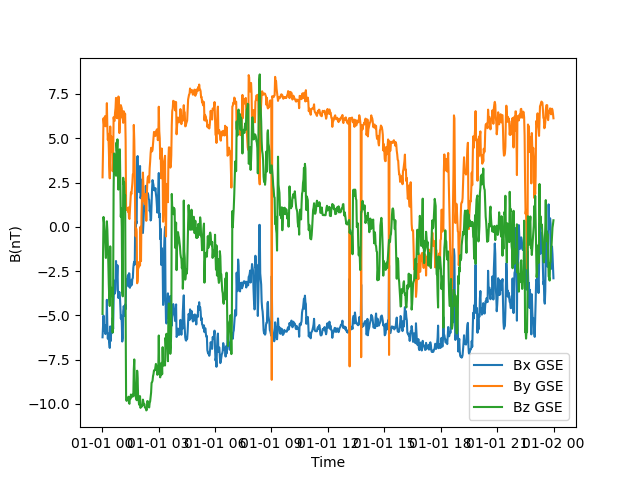

In [20]:
plt.figure()
plt.plot(pycdfpp.to_datetime64(epoch), BGSEc)
plt.legend(labels)
plt.ylabel(f'B({unit})')
plt.xlabel(xlabel)
plt.show()